## 4.2 Loss function (Cost function)
### 오차제곱합 (SSE):
$$ E = \frac{1}{2} \sum_k (y_k - t_k)^2 $$
- $y_k$: 신경망의 출력 (가설)
- $t_k$: 정답 레이블
- k: 데이터의 차원 수


In [1]:
import numpy as np

def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [2]:
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]) # 추정 값
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]) # 레이블

sum_squares_error(y, t)

0.09750000000000003

In [3]:
y = np.array([0.1, 0.05, 0.3, 0.0, 0.05, 0.1, 0.0, 0.1, 0.3, 0.0]) # 추정 값
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]) # 레이블

sum_squares_error(y, t)

0.30749999999999994

### 교차 엔트로피 오차 (CEE):
$$ E = -\sum_k t_k log y_k $$
- $t_k = 1$ 즉 정답일 때 추정 $y_k$의 자연로그 ($log_e$)

In [4]:
import matplotlib.pyplot as plt

x = np.arange(0.001, 1.0, 0.001)
y = np.log(x)
plt.plot(x, y)
plt.xlim(-0.01, 1.0)
plt.ylim(-6, 0)
plt.show()

<Figure size 640x480 with 1 Axes>

In [5]:
def cross_entropy_error(y, t):
    # log(0) = -inf 오버플로우 피하기 위해 작은 값 delta 더함
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [6]:
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]) # 추정 값
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]) # 레이블

cross_entropy_error(y, t)

0.510825457099338

In [7]:
y = np.array([0.1, 0.05, 0.3, 0.0, 0.05, 0.1, 0.0, 0.1, 0.3, 0.0]) # 추정 값
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]) # 레이블

cross_entropy_error(y, t)

1.2039724709926583

$$ E = -\frac{1}{N} \sum_n \sum_k t_{nk} log y_{nk} $$
- N: 데이터 개수
- $t_{nk}$: n번째 데이터의 k번째 값
- $y_{nk}$: 신경망의 출력
- $t_{nk}$: 정답 레이블

In [8]:
# 미니배치 학습

import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [9]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

batch_mask # 랜덤 선택된 이미지 인덱스

array([37564, 59015, 29185, 36917, 42157, 36380, 49525,  1568, 29846,
       33388])

In [10]:
# 레이블이 원-핫 인코딩일 때

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [11]:
# 레이블이 숫자로 주어질 때

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [12]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [13]:
y = np.array([[0.1, 0.05, 0.8, 0.0, 0.05, 0.1, 0.2, 0.1, 0.0, 0.0],
            [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0],
            [0.5, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]])
t = [2, 3, 0]

print([np.arange(3), t])
print(y[np.arange(3), t], '(= y[0, 2], y[1, 3], y[2, 0])')
print(np.log(y[np.arange(3), t] + 1e-7))

[array([0, 1, 2]), [2, 3, 0]]
[0.8 0.  0.5] (= y[0, 2], y[1, 3], y[2, 0])
[ -0.22314343 -16.11809565  -0.69314698]


## 4.3 수치 미분

In [14]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

In [15]:
def square(x):
    return x**2

numerical_diff(square, 3)

6.000000000012662

In [16]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

In [17]:
numerical_diff(function_1, 5)

0.1999999999990898

In [18]:
numerical_diff(function_1, 10)

0.2999999999986347

In [19]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x  # x=x일때의 원래함수-기울기함수
    print(y)
    return lambda t: d*t + y  # 더해줌으로서 접점

In [20]:
tf = tangent_line(function_1, 5)

0.1999999999990898
-0.24999999999544897


0.1999999999990898
-0.24999999999544897
0.2999999999986347
-0.9999999999863469


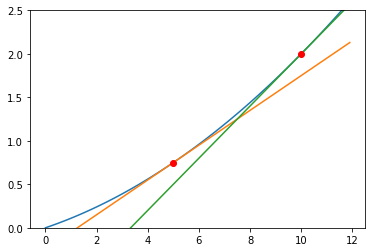

In [21]:
x = np.arange(0.0, 12.0, 0.1)
y = function_1(x)
t1 = (tangent_line(function_1, 5))(x)
t2 = (tangent_line(function_1, 10))(x)
plt.plot(x, y)
plt.plot(x, t1)
plt.plot(x, t2)
plt.plot(5, function_1(5), 'ro')
plt.plot(10, function_1(10), 'ro')
plt.ylim(0, 2.5)
plt.show()

In [22]:
def function_2(x):
    return x[0]**2 + x[1]**2
        #  np.sum(x**2)

## 4.4 기울기(gradient)
$$(\frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1}, ... , \frac{\partial f}{\partial x_n})$$
- Gradient: 위와 같이 모든 변수의 편미분을 벡터로 정리한 것

- 전방 차분:
$$
\frac{f(x+h)-f(x)}{h}
$$

- 중심 차분 (중앙 차분):
$$
\frac{f(x+h)-f(x-h)}{2h}
$$

In [23]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x) # x와 형상이 같은 영행령 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h)
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h)
        x[idx] = tmp_val -h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad

In [24]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

#### Gradient Method:
$$x_0 := x_0 - \eta \frac{\partial f}{\partial x_0}$$
$$x_1 := x_1 - \eta \frac{\partial f}{\partial x_1}$$
- $\eta$: learning rate

In [25]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [26]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1)

array([-6.11110793e-10,  8.14814391e-10])

In [27]:
print('초기값: [-3.0, 4.0]')
for lr in [0.001, 0.01, 0.1, 1, 10]:
    init_x = np.array([-3.0, 4.0])
    print(lr, ': ', np.round(gradient_descent(function_2, init_x=init_x, lr=lr), 4))

초기값: [-3.0, 4.0]
0.001 :  [-2.4557  3.2743]
0.01 :  [-0.3979  0.5305]
0.1 :  [-0.  0.]
1 :  [-3.  4.]
10 :  [-2.58983747e+13 -1.29524862e+12]


- 학습률 너무 작으면 매우 작은 변화
- 학습률 너무 크면 발산

In [28]:
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [29]:
net = simpleNet()
net.W

array([[-0.69114559,  0.78843137,  1.21733526],
       [-0.78797099, -0.14753798, -0.54945462]])

In [30]:
x = np.array([0.6, 0.9])
p = net.predict(x)
p

array([-1.12386125,  0.34027464,  0.235892  ])

In [32]:
t = np.array([0, 1, 0])
net.loss(x, t)

0.7571345289294619

In [35]:
f = lambda w: net.loss(x, t)
# def f(W):
#     return net.loss(x, t)

dW = numerical_gradient(f, net.W)
dW

array([[ 0.0650827 , -0.31859493,  0.25351223],
       [ 0.09762405, -0.4778924 ,  0.38026834]])

## 4.5 학습 알고리즘

In [69]:
from common.functions import *

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

In [54]:
net = TwoLayerNet(3, 4, 2)

In [55]:
net.params

{'W1': array([[ 0.0037309 ,  0.00204196,  0.01713006, -0.01342166],
        [-0.0213728 , -0.00143808, -0.00927626, -0.0048974 ],
        [-0.00528283, -0.00791571,  0.00381962,  0.00521895]]),
 'b1': array([0., 0., 0., 0.]),
 'W2': array([[ 0.00272549, -0.00855999],
        [-0.01295351, -0.00884566],
        [-0.00224658,  0.00456162],
        [-0.0108045 , -0.00333116]]),
 'b2': array([0., 0.])}

In [56]:
for i in net.params:
    print(i, net.params[i].shape)

W1 (3, 4)
b1 (4,)
W2 (4, 2)
b2 (2,)


In [58]:
x = np.array([0.5, 2.1, 0.9])

z1 = sigmoid(np.dot(x, net.params['W1']))
z1

array([0.48805928, 0.49771923, 0.49813064, 0.49692546])

In [67]:
z2 = softmax(np.dot(z1, net.params['W2']))
z2

array([0.49908959, 0.50091041])

In [65]:
net.predict(x)

array([0.49908959, 0.50091041])

In [72]:
net = TwoLayerNet(input_size = 784, hidden_size = 100, output_size = 10)
for i in net.params:
    print(i, net.params[i].shape)

W1 (784, 100)
b1 (100,)
W2 (100, 10)
b2 (10,)


In [82]:
x = np.random.rand(5, 784) # 28*28 img 5장
y = net.predict(x)
t = np.random.rand(5, 10)

grads = net.numerical_gradient(x, t)

for i in grads:
    print(i, grads[i].shape)

W1 (784, 100)
b1 (100,)
W2 (100, 10)
b2 (10,)


In [85]:
# 미니배치 학습 구현

import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

# hyperparams
iters_num = 10
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.numerical_gradient(x_batch, t_batch)
    
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

In [86]:
train_loss_list

[2.2684498050629207,
 2.304401474597422,
 2.295661277766934,
 2.2885176057703083,
 2.2748233109033267,
 2.2933746835531137,
 2.3008965814512923,
 2.287584289368522,
 2.2830045579465996,
 2.300380170201498]

In [106]:
# 같은 학습, numerical_gradient 대신 오차역전파로 개선된 성능 + epoch 당 test acc

from two_layer_net import TwoLayerNet

# hyperparams
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.05
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1 에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grad = network.gradient(x_batch, t_batch) # 오차역전파

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc_list.append(network.accuracy(x_train, t_train))
        test_acc_list.append(network.accuracy(x_test, t_test))
        print('iter: ', i, 'loss: ', loss, 'train_acc: ', network.accuracy(x_train, t_train),
              'test_acc: ', network.accuracy(x_test, t_test))

iter:  0 loss:  2.2984785532345873 train_acc:  0.11236666666666667 test_acc:  0.1135
iter:  600 loss:  1.7047793846589654 train_acc:  0.5338833333333334 test_acc:  0.5435
iter:  1200 loss:  0.7744753888301352 train_acc:  0.7856833333333333 test_acc:  0.7906
iter:  1800 loss:  0.5471724637521883 train_acc:  0.8468 test_acc:  0.8508
iter:  2400 loss:  0.4554304476949075 train_acc:  0.8752333333333333 test_acc:  0.8785
iter:  3000 loss:  0.34468680446306493 train_acc:  0.8902333333333333 test_acc:  0.893
iter:  3600 loss:  0.3481621150890977 train_acc:  0.8984166666666666 test_acc:  0.9031
iter:  4200 loss:  0.3852681501749893 train_acc:  0.9035333333333333 test_acc:  0.9069
iter:  4800 loss:  0.24344461682576388 train_acc:  0.9084833333333333 test_acc:  0.9113
iter:  5400 loss:  0.32073817788060494 train_acc:  0.9106333333333333 test_acc:  0.9134
iter:  6000 loss:  0.47363095808447175 train_acc:  0.9148833333333334 test_acc:  0.9159
iter:  6600 loss:  0.3430683416162503 train_acc:  0.917

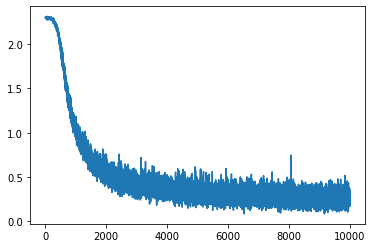

In [109]:
import matplotlib.pyplot as plt
plt.plot(train_loss_list)

(2, 10)

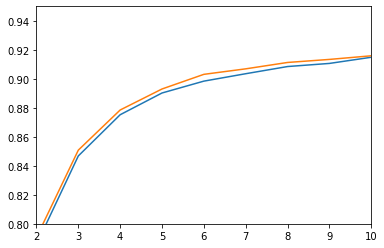

In [118]:
plt.plot(train_acc_list)
plt.plot(test_acc_list)
plt.ylim(0.8, 0.95)
plt.xlim(2, 10)